In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
from io import BytesIO
import os
import requests

In [6]:
model =  ResNet50(weights="imagenet")

102981632/102967424 [==============================] - 1s 0us/step


Resmim girişe uygun formata getrimek için yeniden boyutlandırma fonksiyonu tanımlanıyor

In [7]:
def prepare_image(image, target):
	# giriş görüntüsünü yeniden boyutlandırma ve ön işlemerin yapılması
	image = image.resize(target)
	image = img_to_array(image)
	image = np.expand_dims(image, axis=0)
	image = imagenet_utils.preprocess_input(image)

	# işlenmiş görüntüyü alma
	return image

In [16]:
ImageURL = "https://i2.milimaj.com/i/milliyet/75/0x0/5f58a43655427f11e4d000dc.png"

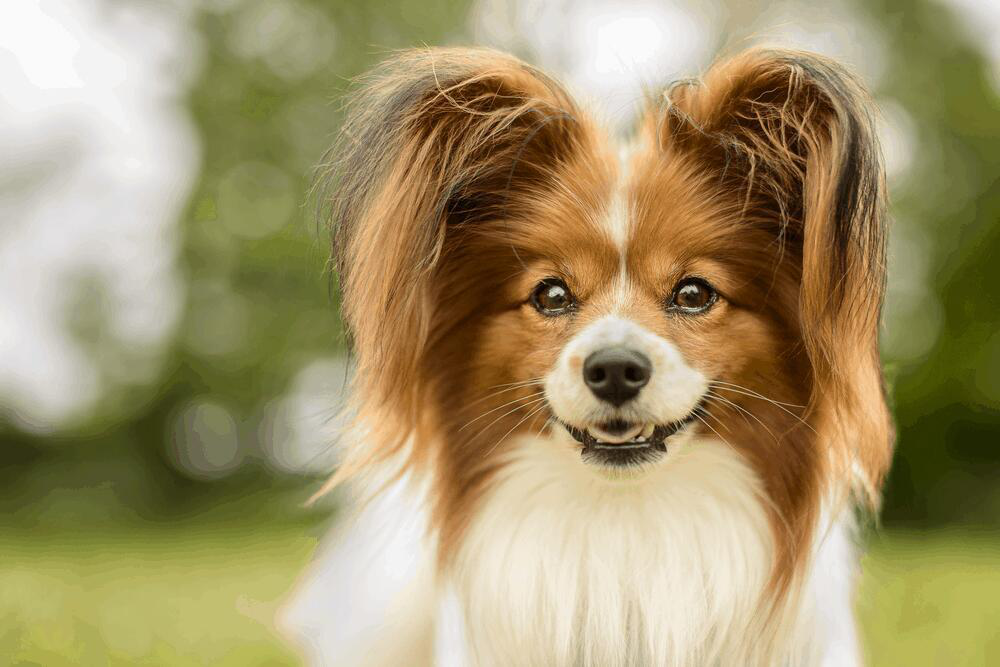

In [17]:
response = requests.get(ImageURL)
image = Image.open(BytesIO(response.content))
image

In [18]:
data = {"success": False}

pre_image = prepare_image(image, target=(224, 224)) # 224 x 224 boyutlu hale getir

preds = model.predict(pre_image) # Kesirim modeline ön işlemden geçmiş görüntüyü uygula

results = imagenet_utils.decode_predictions(preds) #kestirim
data["predictions"] = []


for (imagenetID, label, prob) in results[0]: # ImageNet veri kümseinden etiket, olasılık ve kestrim sonucunu al
  r = {"label": label, "probability": float(prob)}
  data["predictions"].append(r)
  
data["success"] = True

print(data)

{'success': True, 'predictions': [{'label': 'papillon', 'probability': 0.9829795360565186}, {'label': 'Shetland_sheepdog', 'probability': 0.01345902495086193}, {'label': 'collie', 'probability': 0.0016995290061458945}, {'label': 'Japanese_spaniel', 'probability': 0.0006544468342326581}, {'label': 'Blenheim_spaniel', 'probability': 0.0004192391934338957}]}


In [19]:
print("Sınıflandırma tahmini en yüksek olan {0} oranıyla {1}'dır.".format(data["predictions"][0]["probability"],data["predictions"][0]["label"])) 
# En yüksek olasılıklı sonucu ekrana yazdır

Sınıflandırma tahmini en yüksek olan 0.9829795360565186 oranıyla papillon'dır.
